# Star Wars Survey 
This project is part of the guided project available on [Dataquest.io](https://dataquest.io). The survey was held by [FiveThirtyEight](https://fivethirtyeight.com) and thier goal was to answer simple questions, like: How many people are “Star Wars” fans? Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? Which characters are most well-liked and most hated? And who shot first, Han Solo or Greedo? FiveThirtyEight ran a poll through SurveyMonkey Audience, surveying 1,186 respondents from June 3 to 6 2014.

The dataset is available on [FiveThirtyEight GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

<p align="center">
<strong>Survey Dictionary</strong>
</p>

|Field|Description|
|-----|-----------|
|`RespondentID`|An anonymized ID for the respondent (person taking the survey)|
|`Gender`|The respondent's gender|
|`Age`| The respondent's age|
|`Household Income`|The respondent's income|
|`Education`|The respondent's education level|
|`Location (Census Region)`|The respondent's location|
|`Have you seen any of the 6 films in the Star Wars franchise?`|A Yes or No response|
|`Do you consider yourself to be a fan of the Star Wars film franchise?`|A Yes or No response|

## 1. Data Cleaning
### 1.1 Cleaning and Mapping Yes/No Columns

In [1]:
# importing all packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

# reading in the survey as star_wars 
star_wars = pd.read_csv("starwars.csv", encoding="ISO-8859-1")

In [2]:
 # inspecting first 10 rows of the dataset
 star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
# inspecting the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The survey was structured in a way that the data are not easily stored and displayed. Because there are question with multiple possible answers, the question is not repeated in the columns but it's named `"Unnamed:"` with a corresponding number. The first two questions about `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` store `Yes` and `No` data along with NaN values where the responders choose not to answer. We can convert those values to boolean to make the analysis easier.

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].describe()

count     1186
unique       2
top        Yes
freq       936
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

In [5]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

In [6]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 1.2 Cleaning and Mapping Checkbox Columns
The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

|Column|Meaning|
|------|-------|
|`Which of the following Star Wars films have you seen? Please select all that apply.`|Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.|
|`Unnamed: 4`|Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.|
|`Unnamed: 5`|Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.|
|`Unnamed: 6`|Whether or not the respondent saw Star Wars: Episode IV A New Hope.|
|`Unnamed: 7`|Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.|
|`Unnamed: 8`|Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.|

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. When the name of the movie is present in the anwer the fan had seen it. When there's NaN we'll asssume they haven't seen the movie.

In [7]:
episodes = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan : False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(episodes)

In [8]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
    })
    
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 1.3 Cleaning Ranking Colimns

Next the respondents ranked the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. The question `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` can have values from 1-6 and then NaN.

The columns for this question are:

|Column|Meaning|
|----|-----|
|`Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`| How much the respondent liked Star Wars: Episode I The Phantom Menace|
|`Unnamed: 10`|	How much the respondent liked Star Wars: Episode II Attack of the Clones|
|`Unnamed: 11`|How much the respondent liked Star Wars: Episode III Revenge of the Sith|
|`Unnamed: 12`|How much the respondent liked Star Wars: Episode IV A New Hope|
|`Unnamed: 13`|How much the respondent liked Star Wars: Episode V The Empire Strikes Back|
|`Unnamed: 14`|How much the respondent liked Star Wars: Episode VI Return of the Jedi|


We'll need to convert each of these columns to a number, then rename the column something more intuitive.

In [9]:
# renaming the columns
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranked_1",
    "Unnamed: 10": "ranked_2",
    "Unnamed: 11": "ranked_3",
    "Unnamed: 12": "ranked_4",
    "Unnamed: 13": "ranked_5",
    "Unnamed: 14": "ranked_6"
    })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranked_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
# converting the columns to float data type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## 2. Data Analysing
### 2.1 Finding the Favorite Movies


In [11]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_mean

ranked_1    3.732934
ranked_2    4.087321
ranked_3    4.341317
ranked_4    3.272727
ranked_5    2.513158
ranked_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

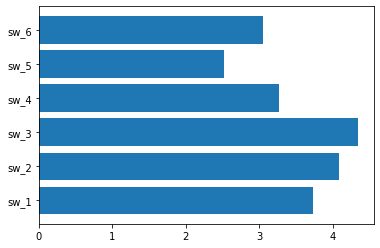

In [12]:
plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], ranking_mean)

The plot above shows that the most popular movies are the original ones: from the episode V being the most favorite, followed by episodes VI and IV. (Remember the lower the score the more popular the film is.)

### 2.2 Finding the Most Viewed Movies

In [13]:
views = star_wars[star_wars.columns[3:9]].sum()
views

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

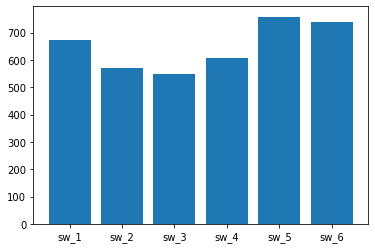

In [14]:
plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], views)

The most viewed episode was Episode V, followed by Episode VI. The original movies were in total viewed more times than the new trilogy.

## 3. Working With Subsets
Various questions in the survey contains binary data that can be split into subsets and then be analyzed further. The subsets are gender (male, female), fan of Star Trek (yes, no), and fan of the Star Wars (ture, false). We'll do the analysis above for each subset.

### 3.1 Gender | Favorite Movies

In [15]:
# creating the two subsets
females = star_wars[star_wars["Gender"] == "Female"]
males = star_wars[star_wars["Gender"] ==  "Male"]

In [16]:
rank_female = females[females.columns[9:15]].mean()
rank_male = males[males.columns[9:15]].mean()

print(rank_female)
print("\n")
print(rank_male)

ranked_1    3.429293
ranked_2    3.954660
ranked_3    4.418136
ranked_4    3.544081
ranked_5    2.569270
ranked_6    3.078086
dtype: float64


ranked_1    4.037825
ranked_2    4.224586
ranked_3    4.274882
ranked_4    2.997636
ranked_5    2.458629
ranked_6    3.002364
dtype: float64


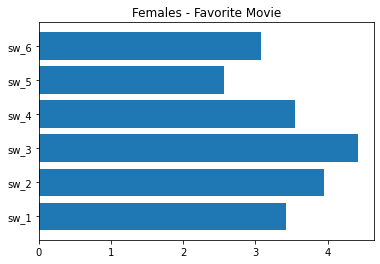

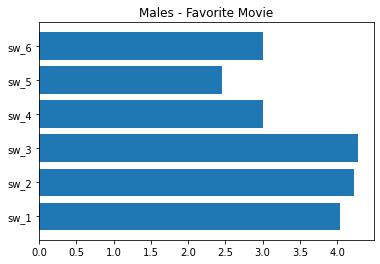

In [17]:
plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_female)
plt.title("Females - Favorite Movie")
plt.show()

plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_male)
plt.title("Males - Favorite Movie")
plt.show()

### 3.2 Gender | Most Viewed Movies

In [18]:
female_views = females[females.columns[3:9]].sum()
male_views = males[males.columns[3:9]].sum()
print(female_views)
print("\n")
print(male_views)

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


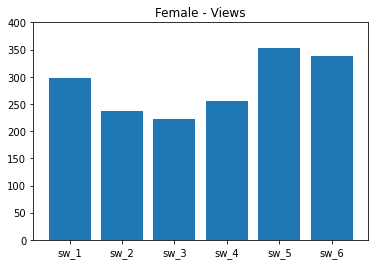

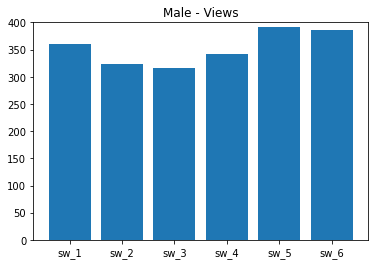

In [19]:
plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], female_views)
plt.title("Female - Views")
plt.ylim(0,400)
plt.show()

plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], male_views)
plt.title("Male - Views")
plt.ylim(0,400)
plt.show()

Episode V is the most popular among both genders. Both genders prefer the original trilogy of Star Wars Movies. More males are waching the new trilogy, but they are more harsh when rating the newer films.

### 3.3 Star Trek | Favorite Movies

In [20]:
# creating two subsets - Star Trek fans on non-fans
star_trek_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_nofan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

In [21]:
rank_st_fan = star_trek_fan[star_trek_fan.columns[9:15]].mean()
rank_st_nofan = star_trek_nofan[star_trek_nofan.columns[9:15]].mean()

print(rank_st_fan)
print("\n")
print(rank_st_nofan)

ranked_1    3.968675
ranked_2    4.255422
ranked_3    4.403382
ranked_4    3.110843
ranked_5    2.407229
ranked_6    2.850602
dtype: float64


ranked_1    3.487864
ranked_2    3.915254
ranked_3    4.278450
ranked_4    3.433414
ranked_5    2.634383
ranked_6    3.244552
dtype: float64


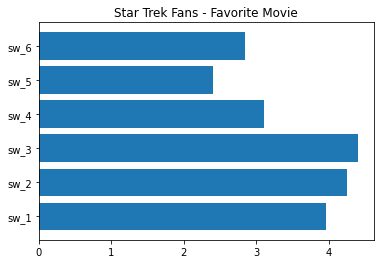

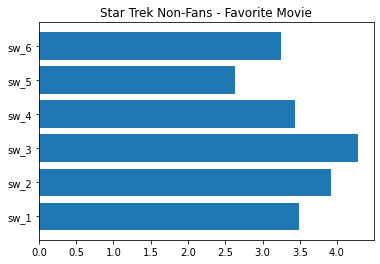

In [22]:
plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_st_fan)
plt.title("Star Trek Fans - Favorite Movie")
plt.show()

plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_st_nofan)
plt.title("Star Trek Non-Fans - Favorite Movie")
plt.show()

### 3.4 Star Trek | Most Viewed Movies

In [23]:
st_fan_views = star_trek_fan[star_trek_fan.columns[3:9]].sum()
st_nofan_views = star_trek_nofan[star_trek_nofan.columns[3:9]].sum()
print(st_fan_views)
print("\n")
print(st_nofan_views)

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


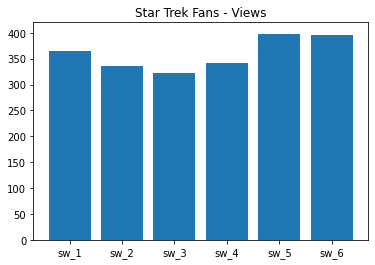

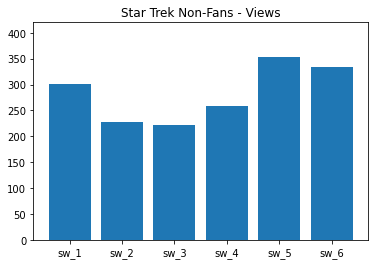

In [24]:
plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], st_fan_views)
plt.title("Star Trek Fans - Views")
plt.ylim(0,420)
plt.show()

plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], st_nofan_views)
plt.title("Star Trek Non-Fans - Views")
plt.ylim(0,420)
plt.show()

The original trilogy is the most favorite withing the two groups - Star Trek fans and not fans. However when it comes to the number of views of each film, Star Trek fans have bigger viewing numbers. This might be because once a sci-fi fan, you watch more sci-fi movies.

### 3.5 Star Wars | Favorite Movies

In [25]:
# creating two subsets - Star Wars fans on non-fans
star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
star_wars_nofan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [26]:
rank_sw_fan = star_wars_fan[star_wars_fan.columns[9:15]].mean()
rank_sw_nofan = star_wars_nofan[star_wars_nofan.columns[9:15]].mean()

print(rank_sw_fan)
print("\n")
print(rank_sw_nofan)

ranked_1    4.141304
ranked_2    4.342391
ranked_3    4.417423
ranked_4    2.932971
ranked_5    2.333333
ranked_6    2.829710
dtype: float64


ranked_1    2.936396
ranked_2    3.591549
ranked_3    4.193662
ranked_4    3.933099
ranked_5    2.862676
ranked_6    3.471831
dtype: float64


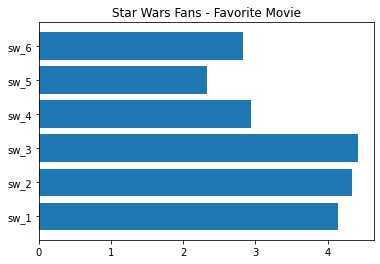

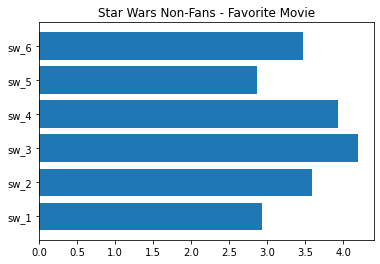

In [27]:
plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_sw_fan)
plt.title("Star Wars Fans - Favorite Movie")
plt.show()

plt.barh(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], rank_sw_nofan)
plt.title("Star Wars Non-Fans - Favorite Movie")
plt.show()

### 3.6 Star Wars | Most Viewed Movies

In [28]:
sw_fan_views = star_wars_fan[star_wars_fan.columns[3:9]].sum()
sw_nofan_views = star_wars_nofan[star_wars_nofan.columns[3:9]].sum()
print(sw_fan_views)
print("\n")
print(sw_nofan_views)

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


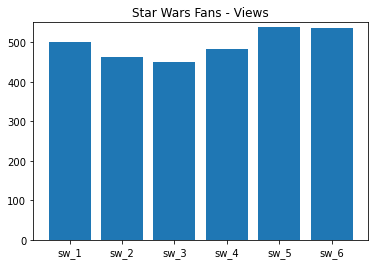

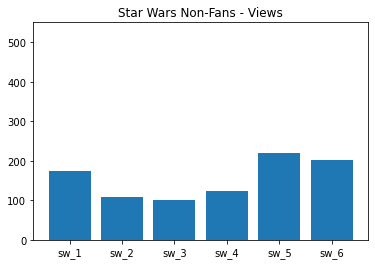

In [29]:
plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], sw_fan_views)
plt.title("Star Wars Fans - Views")
plt.ylim(0,550)
plt.show()

plt.bar(["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6"], sw_nofan_views)
plt.title("Star Wars Non-Fans - Views")
plt.ylim(0,550)
plt.show()

There is no surprise taht the Star Wars fans have seen the movies almost twice as much as the non-fans. Interestingly the people who are not considering themselves fans of the Star Wars franchise are ranking highly even the new trilogy. Episode I is the second most popular after the episode V. But even episode II is performing quite well among the non-fans. 